<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Getting-Stats" data-toc-modified-id="Getting-Stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Stats</a></span><ul class="toc-item"><li><span><a href="#Calculate-percentage-nwords" data-toc-modified-id="Calculate-percentage-nwords-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Calculate percentage nwords</a></span></li><li><span><a href="#Calculate-amount-of-unique-words" data-toc-modified-id="Calculate-amount-of-unique-words-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Calculate amount of unique words</a></span></li></ul></li><li><span><a href="#Plotting-&amp;-Displaying" data-toc-modified-id="Plotting-&amp;-Displaying-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting &amp; Displaying</a></span></li></ul></div>

# Tha Carter V lyrics analysis

## Dependencies

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

## Getting Stats

### Calculate percentage nwords

In [6]:
def getPercentageNWords(words):
    NWords = ['nigga', 'niggaz', 'niggas']
    nNWords = 0
    for word in words:
        if word in NWords:
            nNWords += 1
    return nNWords

### Calculate amount of unique words

In [12]:
def getUniqueWords(words):
    uniquewords = []
    for word in words:
        if word not in uniquewords:
            uniquewords.append(word)
    return len(uniquewords)

In [67]:
def getWordList(lyrics):
    raw = lyrics.replace(',', '')
    raw = raw.replace('(', '')
    raw = raw.replace(')', '')
    raw = raw.replace('\n', ' ')
    words = raw.split(' ')
    return words

#DataFrame for all stats
df = pd.DataFrame(columns=['seq', 'Song Title', 'Words', 'N-Words', 'Unique Words'])

#Directory of all songlyrics
directory = '../Datafiles/ThaCarterV_Lyrics'

for filename in os.listdir(directory):
    file = directory+'/'+filename
    f = open(file, 'r')
    lyrics = f.read()
    words = getWordList(lyrics)
    seqtitle = filename[:-4]
    seq = seqtitle.split('. ')[0]
    title = seqtitle.split('. ')[1]
    nwords = len(words)
    nNwords = getPercentageNWords(words)
    uniquewords = getUniqueWords(words)
    df = df.append({'seq':seq, 'Song Title':title, 'Words':nwords, 'N-Words':nNwords, 'Unique Words':uniquewords}, ignore_index=True)
    f.close()

## Plotting & Displaying

In [68]:
#Turn seq column into numeric datatype
df[['seq']] = df[['seq']].apply(pd.to_numeric)
#Sort by seq
df.set_index('seq', inplace=True)
df.sort_index(inplace=True)
#Set title as index for easy plotting
df.set_index('Song Title', inplace=True, drop=True)
display(df)

,Words,N-Words,Unique Words
Song Title,,,
Don't Cry,480,1,243
Dedicate,716,0,295
Uproar,582,0,239
Let It Fly,601,1,286
Can't Be Broken,489,0,215
Dark Side Of The Moon,485,0,169
Mona Lisa,1326,21,504
What About Me,444,0,145
Open Letter,720,8,358


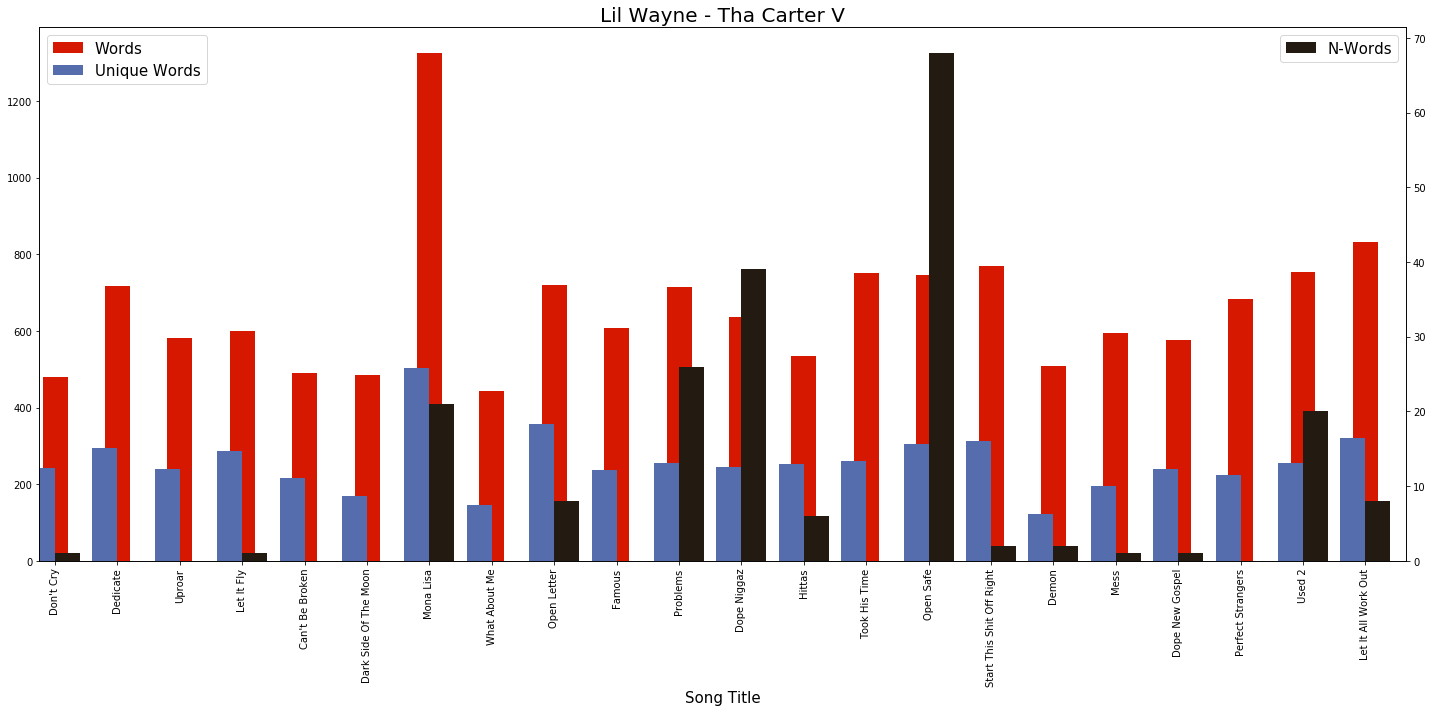

In [87]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width=0.4
df[['Words']].plot(kind='bar', color=['#D61800'], ax=ax, position=.5, width=width)
df[['Unique Words']].plot(kind='bar', color=['#556DAC'], ax=ax, position=1, width=width)
df[['N-Words']].plot(kind='bar', color=['#231B12'], ax=ax2, position=0, width=width)
ax.legend(loc='upper left', prop={'size':15})
ax2.legend(loc='upper right', prop={'size':15})
plt.title('Lil Wayne - Tha Carter V', size=20)
ax.set_xlabel('Song Title', size=15)
plt.tight_layout()
plt.savefig('png/ThaCarterViz.png')
plt.show()